<h1>Automatic High or Lower Game</h1>

In [ ]:
from typing import TypedDict, Dict, List
from langgraph.graph import StateGraph, END
import random

In [ ]:
class GameState(TypedDict):
    player_name: str
    guesses: List[int]
    hint: str
    attemps: int
    lower_bound: int
    upper_bound: int
    correct_number: int



In [70]:
def setup_node(state: GameState) -> GameState:
    """This node is where we set up all necesary data for the game"""
    state["player_name"] = f"Welcome, {state['player_name']}!"
    state["correct_number"] = random.randint(1, 20)
    state["guesses"] = []
    state["attemps"] = 0
    state["hint"] = "Game started! Try to guess the number."
    state["lower_bound"] = 1 
    state["upper_bound"] = 20 
    print(f"{state['player_name']} The game has begun. I'm thinking of a number between 1 and 20.")
    return state


def guess_node(state: GameState) -> GameState:
    """This node is where it needs to guess the correct number"""
    state['guesses'].append(random.randint(state['lower_bound'], state['upper_bound']))
    state['attemps'] += 1

    print(f"Attempt: {state['attemps']}, Guess: {state['guesses'][-1]},(Current range: {state['lower_bound']}-{state['upper_bound']}) correct number: {state['correct_number']}")

    return state

def hint_node(state: GameState) -> GameState:
    """In this node is where it going to give hints if the number is high or low"""

    last_guess = state['guesses'][-1]
    correct_num = state['correct_number']

    if last_guess < correct_num:
        state['hint'] = f"Your guess, {last_guess} is to low, try a little higher"

        state['lower_bound'] = max(state["lower_bound"], last_guess + 1)

    elif last_guess > correct_num:
        state['hint'] = f"Your guess, {last_guess} is to high, try a little lower"

        state['upper_bound'] = min(state["upper_bound"], last_guess - 1)

    else:
        state['hint'] = f"Your guess, {last_guess} is correct!, you are a legend!!"


    return state

def should_continue(state: GameState) -> GameState:
    """Function to decide what to do next"""
    last_guess = state['guesses'][-1]
    if state["correct_number"] == last_guess:
        print("You made it, the correct number is", state["correct_number"])
        return "end"
    
    elif state['attemps'] == 7:
        print("Game Over, you have tried 7 times with out finding the correct numer")
        return "end"
    else:
        print(f"Continuing game, Attempts {state["attemps"]}/7")
        return "continue"


In [71]:
graph = StateGraph(GameState)

graph.add_node("setup", setup_node)
graph.add_node("guess_node", guess_node)
graph.add_node("hint", hint_node)


graph.add_edge("setup", "guess_node")
graph.add_edge("guess_node", "hint")

graph.add_conditional_edges(
    "hint",
    should_continue,
    {
        "continue": "guess_node",
        "end": END    
    }
)

graph.set_entry_point("setup")

app = graph.compile()

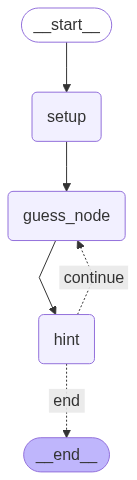

In [72]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [76]:
result = app.invoke({"player_name": "Juli", "guesses": [], "attemps": 0, "lower_bound": 1, "upper_bound": 20})

Welcome, Juli! The game has begun. I'm thinking of a number between 1 and 20.
Attempt: 1, Guess: 8,(Current range: 1-20) correct number: 16
Continuing game, Attempts 1/7
Attempt: 2, Guess: 12,(Current range: 9-20) correct number: 16
Continuing game, Attempts 2/7
Attempt: 3, Guess: 18,(Current range: 13-20) correct number: 16
Continuing game, Attempts 3/7
Attempt: 4, Guess: 13,(Current range: 13-17) correct number: 16
Continuing game, Attempts 4/7
Attempt: 5, Guess: 14,(Current range: 14-17) correct number: 16
Continuing game, Attempts 5/7
Attempt: 6, Guess: 15,(Current range: 15-17) correct number: 16
Continuing game, Attempts 6/7
Attempt: 7, Guess: 17,(Current range: 16-17) correct number: 16
Game Over, you have tried 7 times with out finding the correct numer
